# Ensemble 학습

# RandomForest : DT 를 여러개의 모델로 구축
           -연속형 : 결과값의 평균으로 예측
           -이산형 : 결과값의 투표를 통해서 결정
           
# RF 로 특성중요도를 볼수있다 => 시각화 

In [16]:
from sklearn.datasets import make_classification
X,y = make_classification(1000)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =30)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
# n_estimator = DT 10개 :default
print("Accuracy:\t",( y== rf.predict(X)).mean())
# DT 를 많이 써서 앙상블을 올릴수록 accuracy 변화

Accuracy:	 0.999


Text(0.5, 1.0, 'feature_importances')

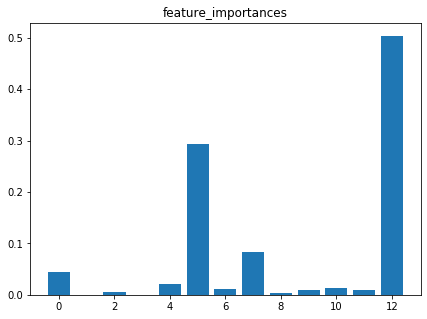

In [56]:
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize = (7,5))
ax.bar(range(0, len(rf.feature_importances_)), rf.feature_importances_)
ax.set_title('feature_importances')

In [15]:
print("특성수", rf.n_features_)
print("모델", rf.estimators_ )

특성수 20
모델 [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1946168823, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=600695854, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                     

In [46]:
from sklearn.datasets import load_boston # 회귀 or 분류
import pandas as pd

boston =load_boston()

X = boston["data"] # x: 독립변수
y = boston["target"] # y:종속변수

names = boston["feature_names"]

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, y)


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
sorted(zip(map(lambda x: round(x,2),rf.feature_importances_), names), reverse=False)#내림차순

[(0.0, 'CHAS'),
 (0.0, 'RAD'),
 (0.0, 'ZN'),
 (0.01, 'AGE'),
 (0.01, 'B'),
 (0.01, 'INDUS'),
 (0.01, 'TAX'),
 (0.02, 'NOX'),
 (0.02, 'PTRATIO'),
 (0.05, 'CRIM'),
 (0.07, 'DIS'),
 (0.31, 'LSTAT'),
 (0.48, 'RM')]

[(0.5, 'LSTAT'), (0.29, 'RM'), (0.08, 'DIS'), (0.05, 'CRIM'), (0.02, 'NOX'), (0.01, 'TAX'), (0.01, 'PTRATIO'), (0.01, 'INDUS'), (0.01, 'B'), (0.01, 'AGE'), (0.0, 'ZN'), (0.0, 'RAD'), (0.0, 'CHAS')]


Text(0.5, 1.0, 'feature importance')

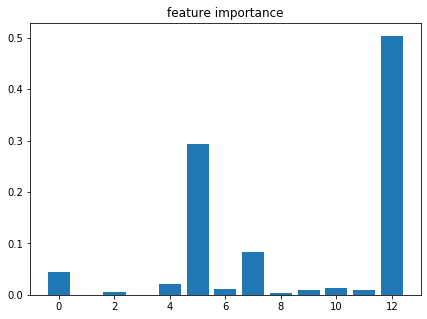

In [51]:


import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(7,5))

ax.bar(range(0, len(rf.feature_importances_)),
       rf.feature_importances_)


ax.set_title('feature importance')

In [81]:
print(list(zip(map(lambda x: round(x,2),rf.feature_importances_), names)))

TypeError: 'zip' object is not callable

 # 평가 : 예측 - 상관계수, mse()

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(y, rf.predict(X))

1.661349209486166

In [54]:
mean_absolute_error(y, rf.predict(X))

0.8719169960474307

In [55]:
r2_score(y, rf.predict(X))

0.9803203275978746

### 결과로 나온값은 domain 에 있는 값에 맞춰서 해석해야함~~ 모든 데이터마다 다 달라

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
# model selection 훈련용데이터 / 테스트데이터 나눠주기


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=10)


forest.fit(X_train, y_train) # fit


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [91]:
# predict = score() 가 대신함

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [96]:
from sklearn.tree import export_graphviz #

# 추정기 100개 있는데
export_graphviz(forest.estimators_[0], out_file="tree.dot",
                class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False,
                filled=True)

# out_file="tree.dot" 이라서 볼수있게 해주는 패키지

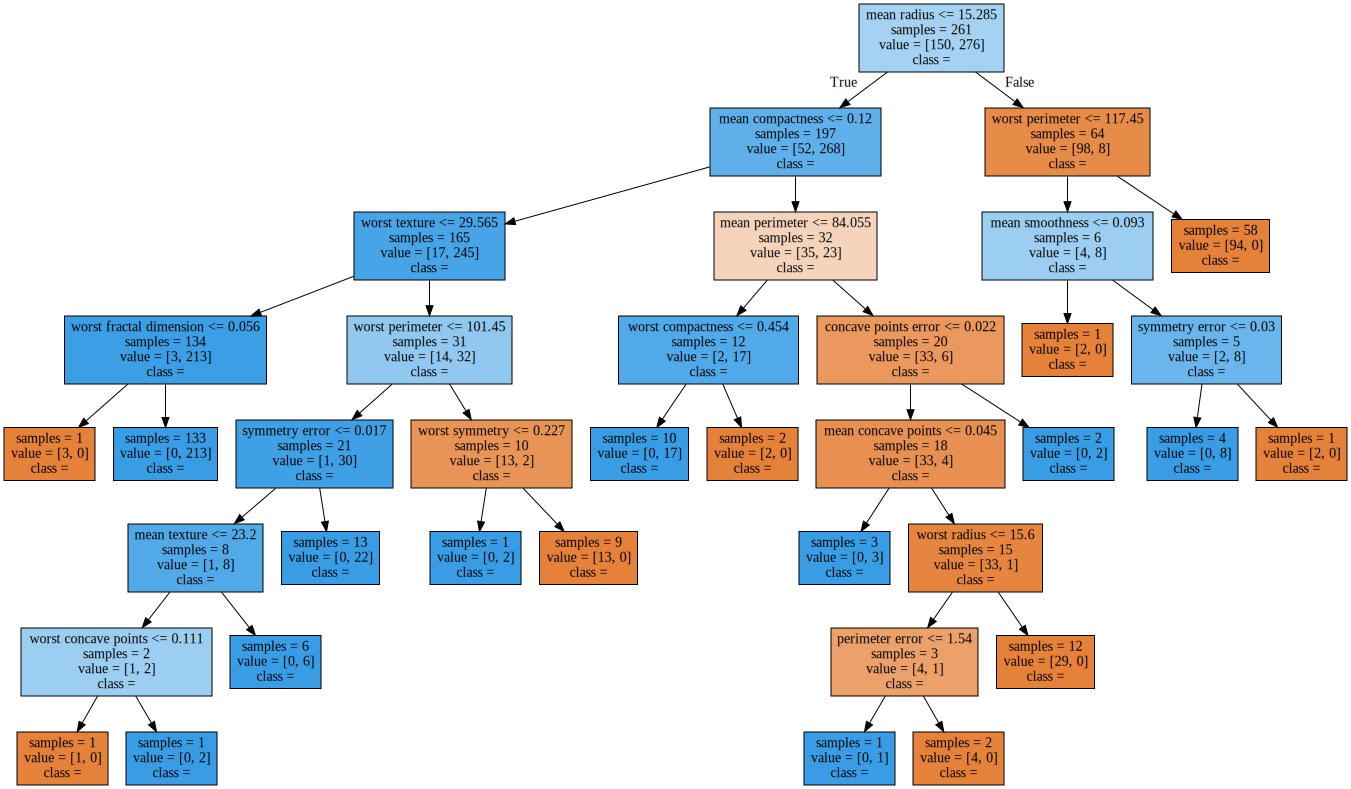

In [107]:
# 아나콘다 에서 시각화 도와주는 패키지
from IPython.display import display
import graphviz 
with open("tree.dot", "rt", encoding='UTF-8') as f: dot_graph=f.read()
    
display(graphviz.Source(dot_graph))


In [122]:
import pandas as pd
boston = load_boston() # data, target 셋팅된 사이킷에서 만들어준 예시데이터

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

print(data.head()),print()


data['PRICE'] = boston.target # price 를 boston.target에 넣어서 하나의 데이터로 묶음 => 훈련용데이터에는 price 가 들어감

print(data.info())
data.describe()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# 데이터프레임 : ndarray + dict(순서보장, 중복허용)

import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error #평가

X, y =data.iloc[:,:-1], data.iloc[:,-1] # 추가한 데이터 빼고
data_dmatrix = xgb.DMatrix(data=X, label=y) #전용행렬          #label=종속변수 넣어줌

# 전용행렬 DMatrix 사용해서 만들어주는 방법이 있고

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                  test_size=0.2, random_state=123)


                          # 선형 회귀방식으로 해라
xg_reg= xgb.XGBRegressor(objective='reg:linear', colsample_bytree = 0.3,
                        learning_rete = 0.1, max_depth =5, alpha=10, n_estimators=10)
                    #learning_rete : 경사하강법에 등장하는 용어 => 학습률
    #모델 생성해줌

xg_reg.fit(X_train, y_train) #fit

preds = xg_reg.predict(X_test) #test 하면 y 예측치 결정

rmse = np.sqrt(mean_squared_error(y_test, preds)) #MSE 에 루트 np.sqrt => RMSE


print("RMSE: ")
rmse

[17:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 


C:\Users\ICT01_02\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ICT01_02\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


10.44929976773286

In [131]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize']=[300,100]
plt.show()

### 전용행렬 DMatrix 사용하지 않고

# 파이썬만의 방식으로 지원

In [135]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn. metrics import accuracy_score

dataset = loadtxt('pima.data', delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]
seed =7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size =test_size, random_state=seed)
model = XGBClassifier()
model.fit(X_train, y_train)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

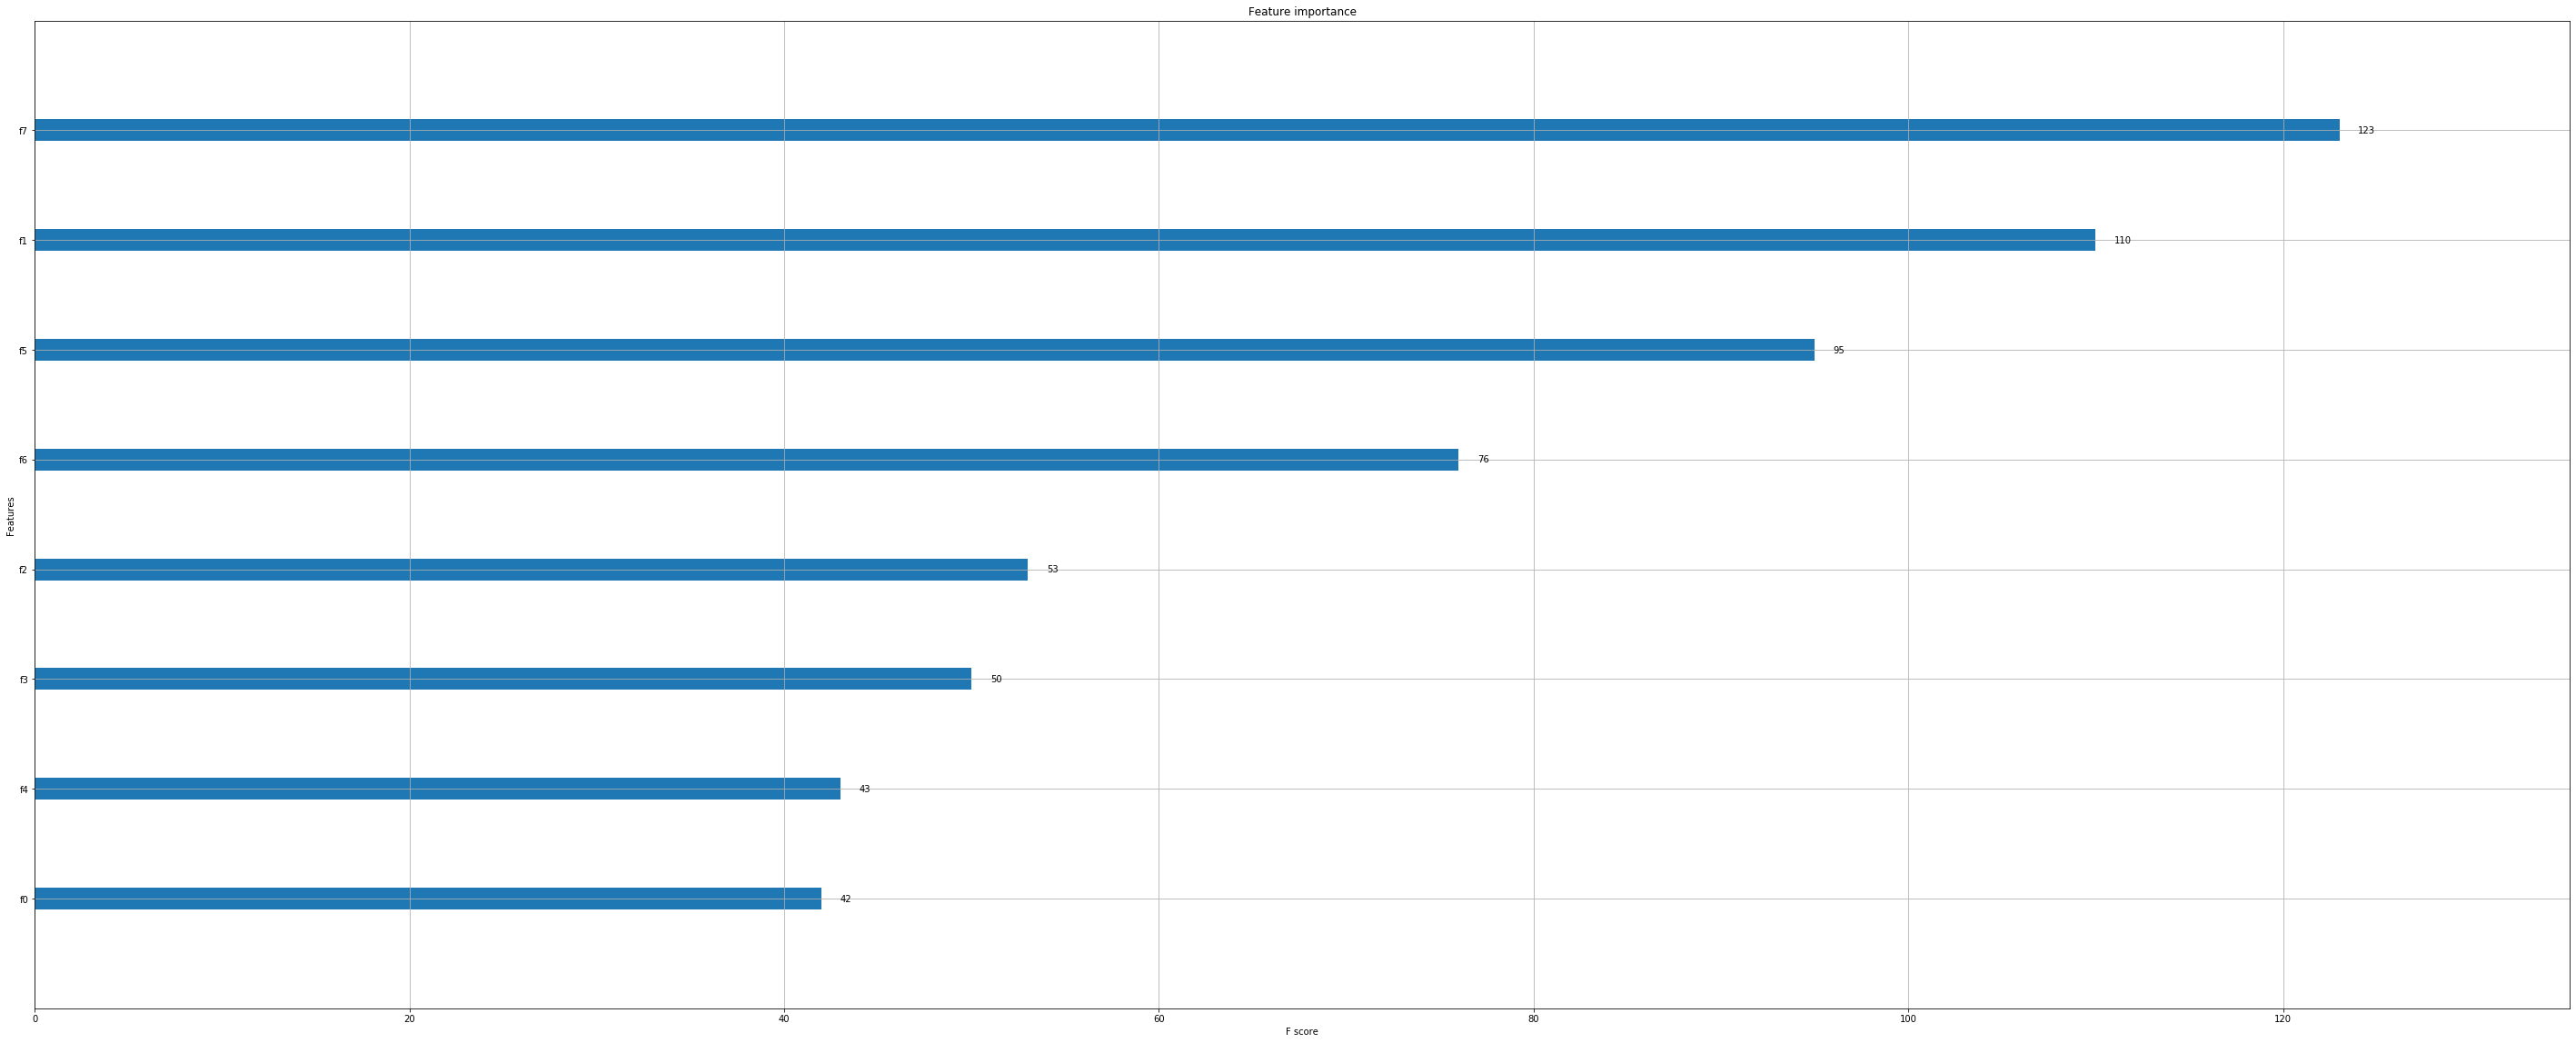

In [139]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
plt.rcParams['figure.figsize'] = [50,20]
pyplot.show()

In [141]:
y_pred = model.predict(X_test)
y_pred

array([0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1.

In [142]:
accuracy = accuracy_score(y_test, y_pred)
accuracy *100

77.95275590551181

In [ ]:
#model = XGBClassifier()
#model.fit(X_train, y_train)
# 위에서 만든 model

In [144]:
from sklearn.feature_selection import SelectFromModel
thresholds = np.sort(model.feature_importances_) #오름차순
thresholds

array([0.0775613 , 0.08040861, 0.08493615, 0.09472006, 0.1021471 ,
       0.10865614, 0.15973376, 0.29183695], dtype=float32)

In [148]:
for thresh in thresholds: #경계선
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train) # 모델 데이터에서 경계선 이하의 중요성을 가진 변수 = 필요없는 변수 제거
    
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    select_X_test = selection.transform(X_test) # 테스트용 데이터 변환
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy:%.2f%%" %(thresh, select_X_train.shape[1], accuracy*100.0)) #변수선택법

Thresh=0.078, n=8, Accuracy:77.95%
Thresh=0.080, n=7, Accuracy:76.38%
Thresh=0.085, n=6, Accuracy:77.56%
Thresh=0.095, n=5, Accuracy:76.38%
Thresh=0.102, n=4, Accuracy:76.38%
Thresh=0.109, n=3, Accuracy:74.80%
Thresh=0.160, n=2, Accuracy:75.98%
Thresh=0.292, n=1, Accuracy:70.08%


In [149]:
import pickle 
pickle.dump(model, open('pima.pickle.dat', 'wb'))#메모리의 내용을 그대로 저장
loaded_model = pickle.load(open("pima.pickle.dat", 'rb')) #load 불러오기 'read b:bineary' 컴퓨터가 읽기

y_pred = loaded_model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
accuracy*100

# 결과값이 잘 나오는걸로  -> pickle 이 제역활을 한다 ~~

77.95275590551181